# Step 0: Import 

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Data Preparation

In [2]:
##read csv data
Ori_data = pd.read_csv("./Data/iris.csv")
##Get the main data
data = Ori_data.iloc[:,1:]
for i in range(len(data)):   ##encode
    if str(data.iloc[i,4]) == "setosa":
        data.iloc[i,4] = 0
    elif str(data.iloc[i,4]) == "versicolor":
        data.iloc[i,4] = 1
    elif str(data.iloc[i,4]) == "virginica":
        data.iloc[i,4] = 2
data = data.iloc[:,:4]
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 2: Dimensionality Reduction

In [3]:
##Normalization
model = StandardScaler()
norm_data = model.fit_transform(data)
for method in ["PCA", "TSNE", "MDS"]:
    ##print(eval(method))
    reduce_model = eval(method)(n_components = 2)
    
    reduce_data = reduce_model.fit_transform(norm_data)
    result = pd.DataFrame(reduce_data, columns = ["X", "Y"])
    cluster_model = KMeans(n_clusters=3)
    result["label"] = cluster_model.fit(reduce_data).labels_
    result.to_csv("./Data/"+method+".csv")

# Step 3: Visualization

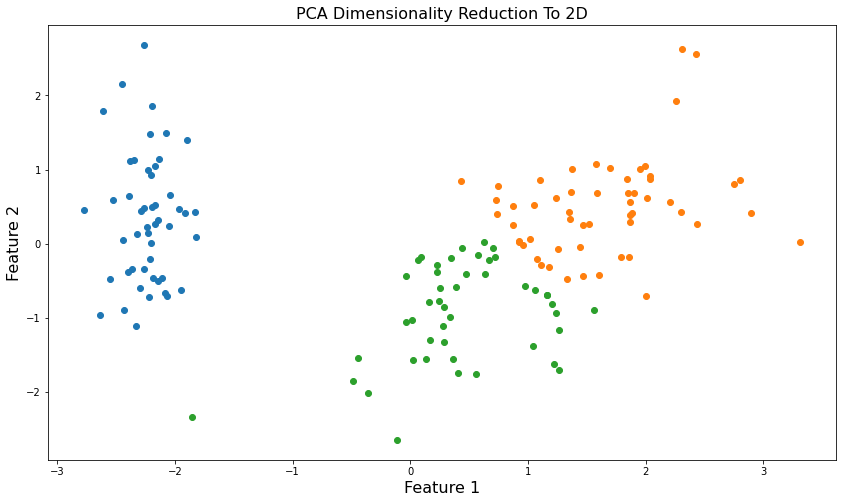

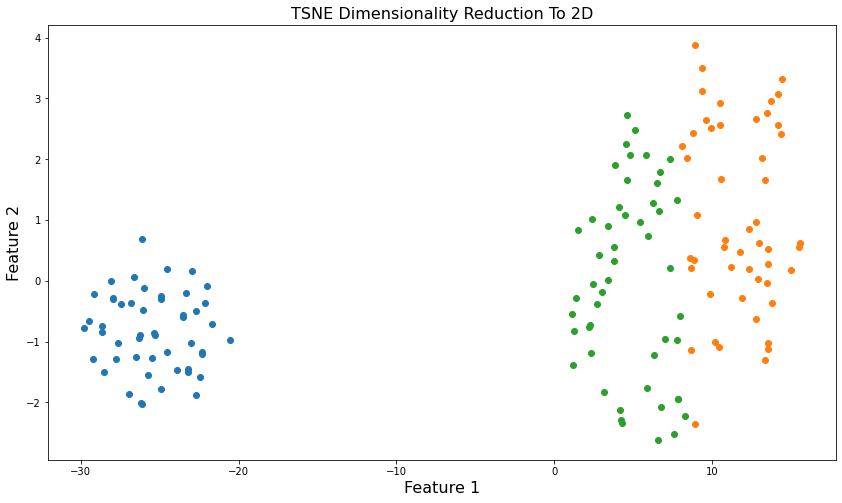

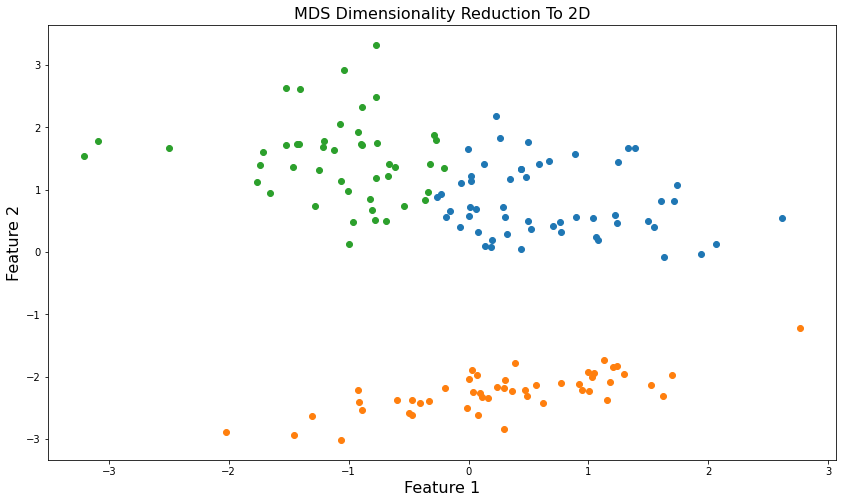

In [4]:
i = 1
for method in ["PCA", "TSNE", "MDS"]:
    plot_data = pd.read_csv("./Data/"+method+".csv")
    plt.figure(figsize= (48, 8))
    plt.subplot(1,3,i)
    for name, group in plot_data.groupby('label'):
        plt.scatter(group['X'], group['Y'], label=name)
        plt.xlabel("Feature 1",fontsize = 16)
        plt.ylabel("Feature 2",fontsize = 16)
        plt.title(method + " Dimensionality Reduction To 2D",fontsize = 16)
    plt.show()
    i += 1